# Analyse World Population Data

## Task

Find out what might make countries better.
1. Have a look at the variables, understand what they are.
2. Pick a variable which interests you in a country.
2. Which other variables are associated with your target variable? Formulate several hypotheses.
3. Explore each hypothesis.
    - Make plots and/or compute statistics.
    - Write a short conclusion, refer to the justifications you found in the data.

## Dataset description

_Source: https://www.kaggle.com/datasets/madhurpant/world-population-data
  (See the bottom of this notebook for the steps to re-create it)_

This dataset describes 192 countries and their populations. Here are the columns, grouped by topic:

1. Height and weight:
    - male_height
    - female_height
    - male_weight
    - female_weight
    - male_bmi
    - female_bmi

2. Life expectancy:
    - male_life_expectancy
    - female_life_expectancy
    - birth_rate
    - death_rate

3. Population density:
    - area
    - population
    - pop_per_km_sq

4. Quality of life:
    - stability
    - rights
    - health
    - safety
    - climate
    - costs
    - popularity

5. Other:
    - iq
    - education_expenditure_per_inhabitant
    - daily_max_temp


## Analysis

In [ ]:
import pandas as pd
import seaborn as sns

# From https://drive.google.com/file/d/181fFa4h4EigLpMlyu3DXaptm41tXVrNS/view
df = pd.read_csv(
    "https://drive.google.com/uc?id=181fFa4h4EigLpMlyu3DXaptm41tXVrNS",
    index_col=0,
)
df.shape

(192, 23)

In [ ]:
df.columns

Index(['male_life_expectancy', 'female_life_expectancy', 'birth_rate',
       'death_rate', 'iq', 'education_expenditure_per_inhabitant',
       'daily_max_temp', 'stability', 'rights', 'health', 'safety', 'climate',
       'costs', 'popularity', 'area', 'population', 'pop_per_km_sq',
       'male_height', 'female_height', 'male_weight', 'female_weight',
       'male_bmi', 'female_bmi'],
      dtype='object')

<ipython-input-3-8d22b530fc09>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method="kendall"), annot=True, fmt=".3f", ax=ax);


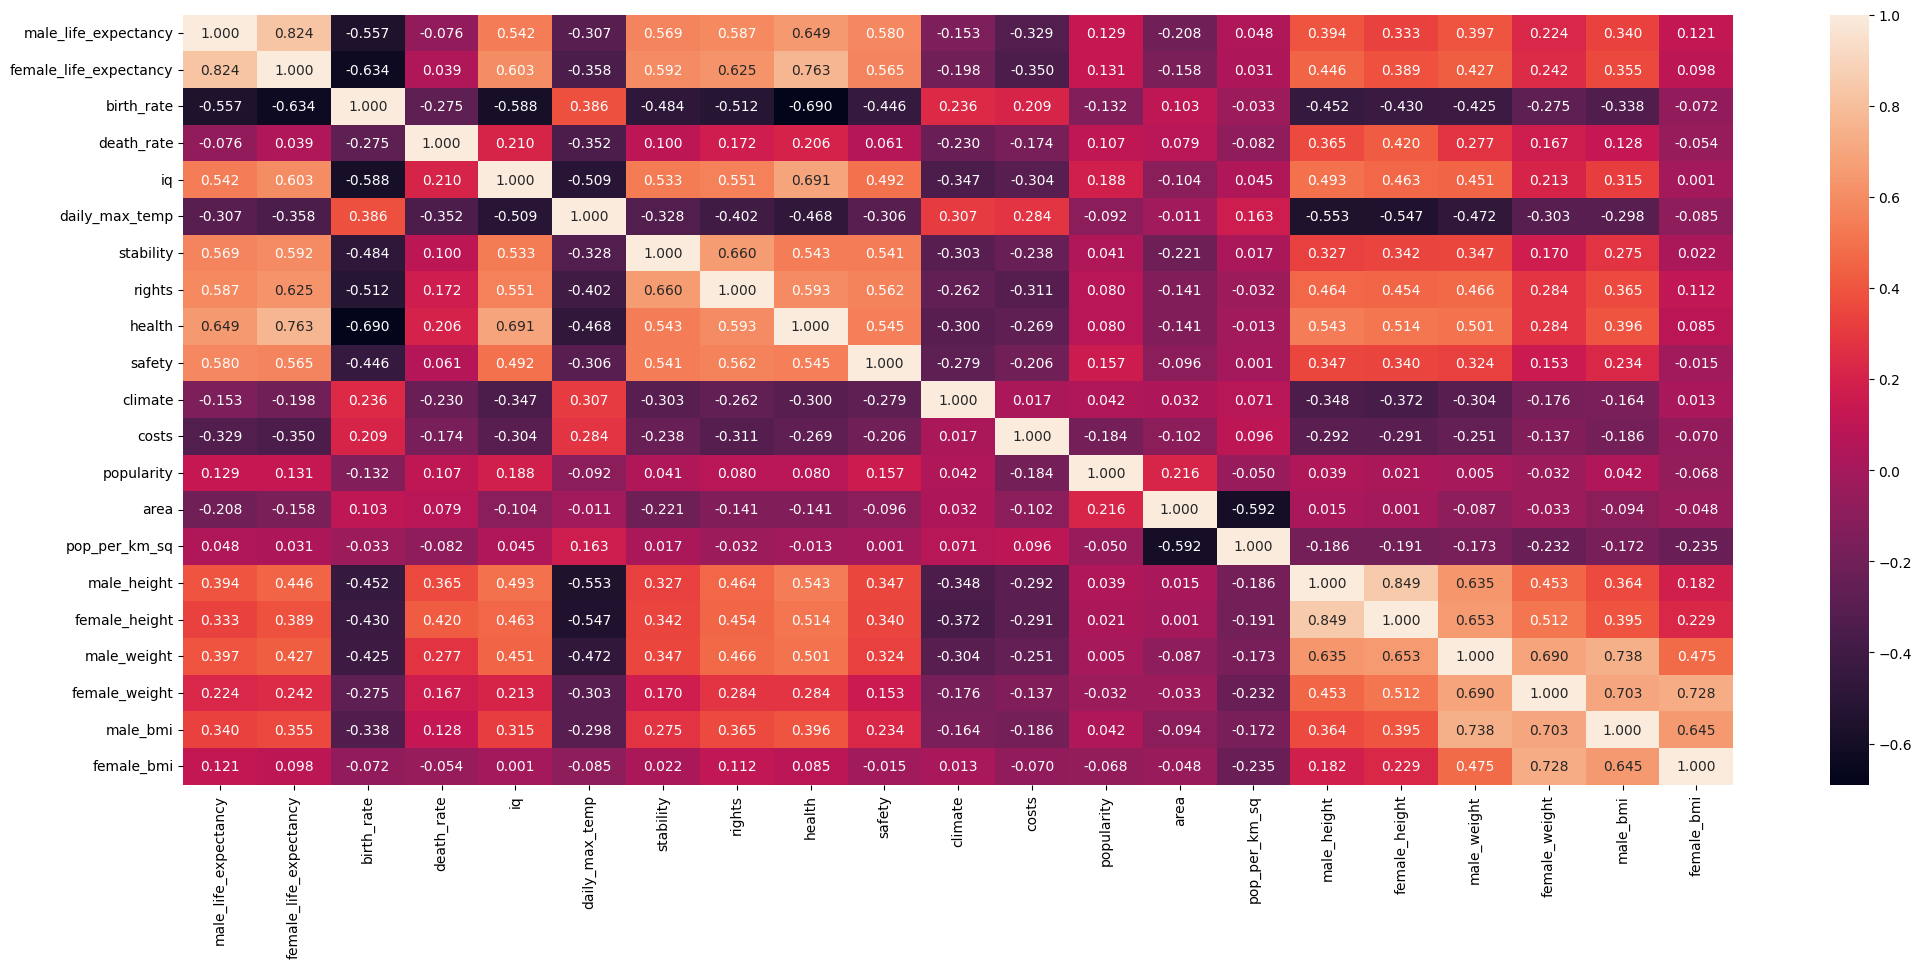

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(25,10))
sns.heatmap(df.corr(method="kendall"), annot=True, fmt=".3f", ax=ax);

In [ ]:
df[df.columns[::-1]].head()

female_bmi  male_bmi  female_weight  male_weight  female_height  \
country                                                                      
Hong Kong        23.8      24.5           61.1         74.4          160.0   
Iceland          25.6      27.1           72.6         89.2          168.0   
Japan            21.9      23.6           54.8         69.5          158.0   
Norway           26.2      27.4           72.6         89.1          166.0   
Singapore        23.2      24.3           60.2         72.8          161.0   

           male_height  pop_per_km_sq population      area  popularity  ...  \
country                                                                 ...   
Hong Kong        174.0            NaN        NaN       NaN        52.0  ...   
Iceland          181.0            NaN        NaN       NaN        33.0  ...   
Japan            172.0          332.5   125.68 M  377970.0        41.0  ...   
Norway           180.0           14.0     5.41 M  385203.0        37.0  ...   
Singapore        173.0         7584.9     5.45 M     719.0        42.0  ...   

           health  rights  stability  daily_max_temp  \
country                                                
Hong Kong   100.0    85.0       77.0            26.2   
Iceland      87.0    92.0       82.0             8.1   
Japan        92.0    86.0       87.0            19.2   
Norway       90.0    99.0       89.0             9.0   
Singapore    79.0    89.0       83.0            31.5   

           education_expenditure_per_inhabitant     iq  death_rate birth_rate  \
country                                                                         
Hong Kong                                   915  108.0         6.8        5.8   
Iceland                                   2,443  101.0         7.8       12.3   
Japan                                     1,258  105.0         8.8        6.8   
Norway                                    3,527   99.0         9.8        9.8   
Singapore                                   908  108.0        10.8        8.5   

           female_life_expectancy  male_life_expectancy  
country                                                  
Hong Kong                    88.0                  82.9  
Iceland                      84.5                  81.7  
Japan                        87.7                  81.6  
Norway                       84.9                  81.6  
Singapore                    86.1                  81.5  

[5 rows x 23 columns]

In [ ]:
df.index

Index(['Hong Kong', 'Iceland', 'Japan', 'Norway', 'Singapore', 'Macao',
       'Australia', 'Switzerland', 'Malta', 'Israel',
       ...
       'Andorra', 'French Polynesia', 'Cook Islands', 'Niue', 'American Samoa',
       'Tokelau', 'Tonga', 'Palau', 'Kiribati', 'Micronesia'],
      dtype='object', name='country', length=192)

In [ ]:
df.groupby(df.index)[["female_life_expectancy"]].mean().sort_values("female_life_expectancy",ascending=False)

female_life_expectancy
country                                
Hong Kong                          88.0
Japan                              87.7
Macao                              87.3
South Korea                        86.5
Singapore                          86.1
...                                 ...
Tunisia                             NaN
Tuvalu                              NaN
Uganda                              NaN
Uruguay                             NaN
Virgin Islands                      NaN

[192 rows x 1 columns]

In [ ]:
print(expect.max())
print(expect.min())

female_life_expectancy    88.0
dtype: float64
female_life_expectancy    55.9
dtype: float64


<Axes: xlabel='country', ylabel='female_life_expectancy'>

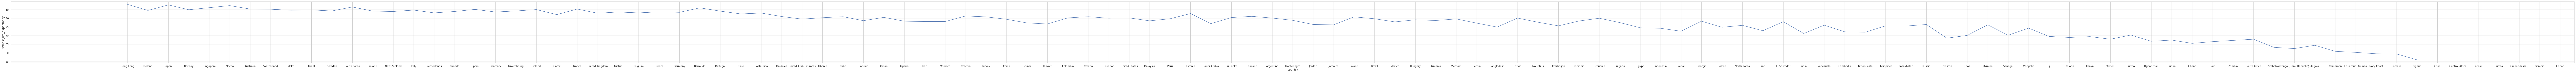

In [ ]:
#It was found out that there is a correlation between safetey & female life expectancy
from seaborn.relational import lineplot
plt.figure().set_figwidth(200)
sns.set(rc={"figure.figsize":(16, 9)}, style="whitegrid") #width=16, #height=9
lineplot(x=df.index,y="female_life_expectancy", data= df)

<Axes: xlabel='country', ylabel='safety'>

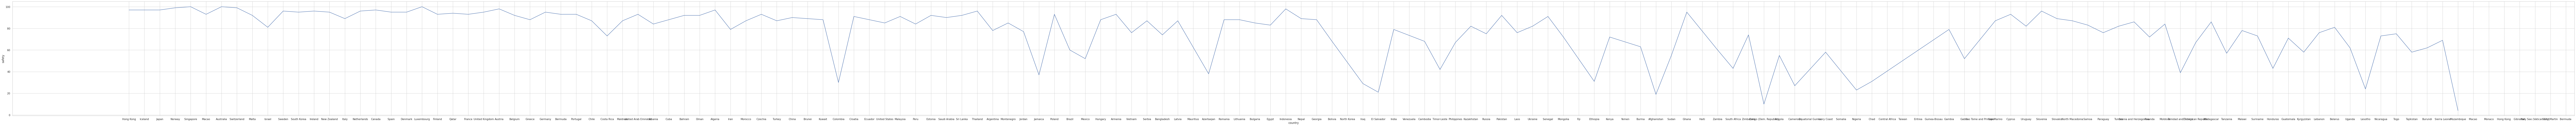

In [ ]:
from seaborn import lineplot
plt.figure().set_figwidth(200)
sns.set(rc={"figure.figsize":(16, 9)}, style="whitegrid") #width=16, #height=9
lineplot(x=df.index, y="safety", data=df)

In [ ]:
#Hong Kong is the highest country in female life expectancy
df.loc[["Hong Kong"]]

male_life_expectancy  female_life_expectancy  birth_rate  \
country                                                               
Hong Kong                  82.9                    88.0         5.8   

           death_rate     iq education_expenditure_per_inhabitant  \
country                                                             
Hong Kong         6.8  108.0                                  915   

           daily_max_temp  stability  rights  health  ...  popularity  area  \
country                                               ...                     
Hong Kong            26.2       77.0    85.0   100.0  ...        52.0   NaN   

           population  pop_per_km_sq  male_height female_height  male_weight  \
country                                                                        
Hong Kong         NaN            NaN        174.0         160.0         74.4   

           female_weight  male_bmi  female_bmi  
country                                         
Hong Kong           61.1      24.5        23.8  

[1 rows x 23 columns]

In [ ]:
df.loc["Hong Kong"][["safety"]]

safety    97.0
Name: Hong Kong, dtype: object

In [ ]:
#Chad the lowest country in female life expectancy. Could safety be the reason?
df.loc[["Chad"]]

male_life_expectancy  female_life_expectancy  birth_rate  death_rate  \
country                                                                         
Chad                     53.1                    55.9        41.2        11.7   

           iq education_expenditure_per_inhabitant  daily_max_temp  stability  \
country                                                                         
Chad     65.0                                   10            35.4       46.0   

         rights  health  ...  popularity  area  population  pop_per_km_sq  \
country                  ...                                                
Chad       12.0     0.0  ...        44.0   NaN         NaN            NaN   

         male_height female_height  male_weight  female_weight  male_bmi  \
country                                                                    
Chad           171.0         162.0         64.1           57.3      22.0   

         female_bmi  
country              
Chad           21.9  

[1 rows x 23 columns]

In [ ]:
df.loc["Chad"][["safety"]]

safety    31.0
Name: Chad, dtype: object

In [ ]:
data = {'country': ['Hong Kong', 'Chad'], 'safety': [97,31]}

In [ ]:
dk = pd.DataFrame(data)

<Axes: xlabel='country', ylabel='safety'>

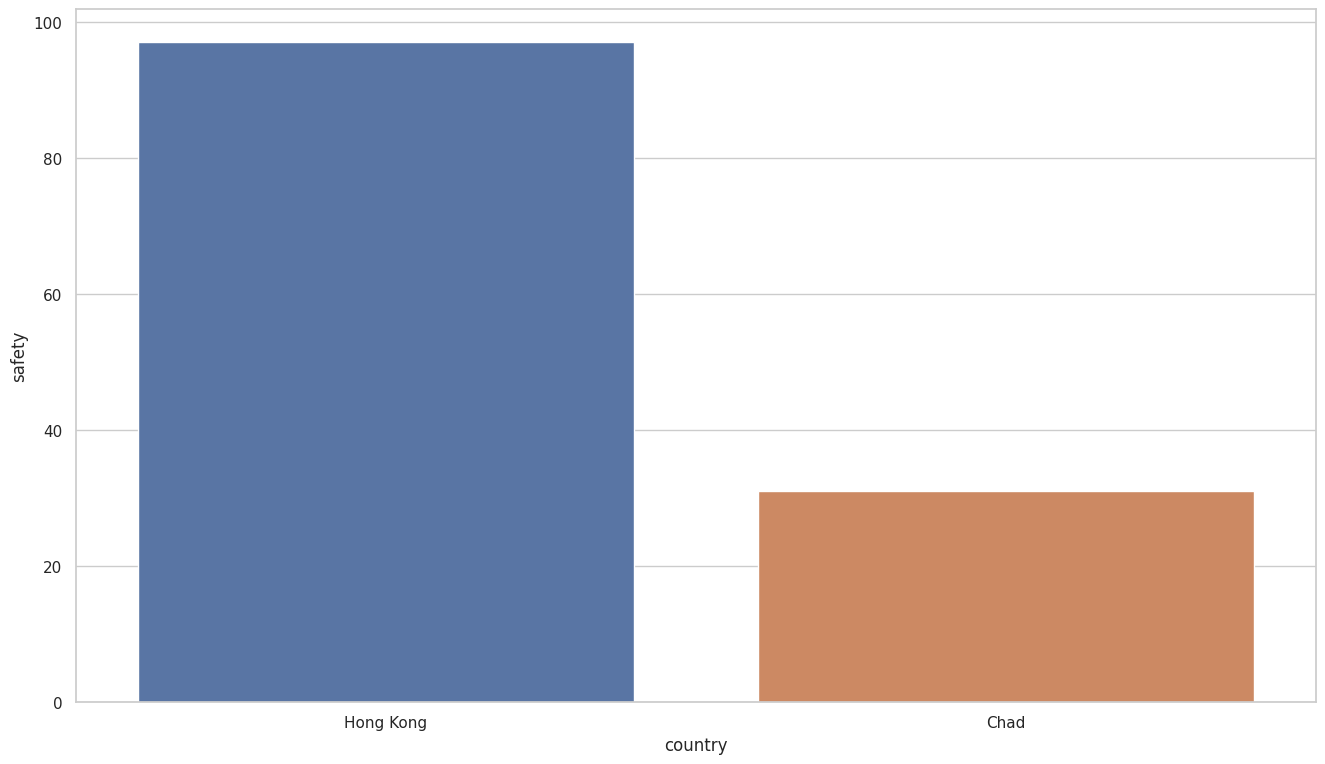

In [ ]:
from seaborn import barplot
sns.set(rc={"figure.figsize":(16, 9)}, style="whitegrid") #width=16, #height=9
barplot(x="country", y="safety", data=dk)

In [ ]:
#conclusion
#the less the safety, the less the female life expectancy. However, there must be other factors as well affecting female life expectancy

<Axes: xlabel='country', ylabel='male_life_expectancy'>

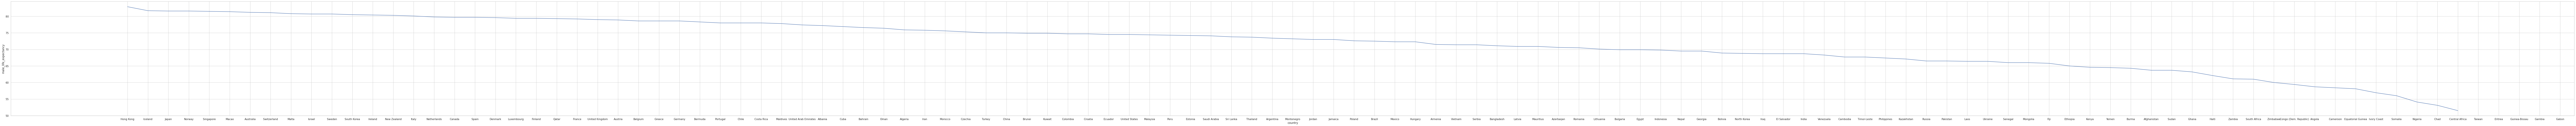

In [ ]:
#it was found out that there is a correlation between male life expectancy & Iq
from seaborn.relational import lineplot
plt.figure().set_figwidth(200)
sns.set(rc={"figure.figsize":(16, 9)}, style="whitegrid") #width=16, #height=9
lineplot(x=df.index,y="male_life_expectancy", data= df)

In [ ]:
df.groupby(df.index)[["male_life_expectancy"]].mean().sort_values("male_life_expectancy",ascending=False)

male_life_expectancy
country                              
Hong Kong                        82.9
Iceland                          81.7
Japan                            81.6
Norway                           81.6
Singapore                        81.5
...                               ...
Tunisia                           NaN
Tuvalu                            NaN
Uganda                            NaN
Uruguay                           NaN
Virgin Islands                    NaN

[192 rows x 1 columns]

In [ ]:
#Hong Kong is the highest country in male life expectancy
df.loc[["Hong Kong"]]

male_life_expectancy  female_life_expectancy  birth_rate  \
country                                                               
Hong Kong                  82.9                    88.0         5.8   

           death_rate     iq education_expenditure_per_inhabitant  \
country                                                             
Hong Kong         6.8  108.0                                  915   

           daily_max_temp  stability  rights  health  ...  popularity  area  \
country                                               ...                     
Hong Kong            26.2       77.0    85.0   100.0  ...        52.0   NaN   

           population  pop_per_km_sq  male_height female_height  male_weight  \
country                                                                        
Hong Kong         NaN            NaN        174.0         160.0         74.4   

           female_weight  male_bmi  female_bmi  
country                                         
Hong Kong           61.1      24.5        23.8  

[1 rows x 23 columns]

In [ ]:
df.loc["Hong Kong"][["iq"]]

iq    108.0
Name: Hong Kong, dtype: object

In [ ]:
#Central Africa the lowest country in male life expectancy
df.loc[["Central Africa"]]

male_life_expectancy  female_life_expectancy  birth_rate  \
country                                                                    
Central Africa                  51.5                    55.9        34.9   

                death_rate    iq education_expenditure_per_inhabitant  \
country                                                                 
Central Africa        11.7  64.0                                    6   

                daily_max_temp  stability  rights  health  ...  popularity  \
country                                                    ...               
Central Africa            32.5        NaN     NaN     NaN  ...         NaN   

                area  population  pop_per_km_sq  male_height female_height  \
country                                                                      
Central Africa   NaN         NaN            NaN          NaN           NaN   

                male_weight  female_weight  male_bmi  female_bmi  
country                                                           
Central Africa          NaN            NaN       NaN         NaN  

[1 rows x 23 columns]

In [ ]:
df.loc["Central Africa"][["iq"]]

iq    64.0
Name: Central Africa, dtype: object

In [ ]:
data1 = {'country': ['Hong Kong', 'Central Africa'], 'iq': [108,64]}
dl=pd.DataFrame(data1)

<Axes: xlabel='country', ylabel='iq'>

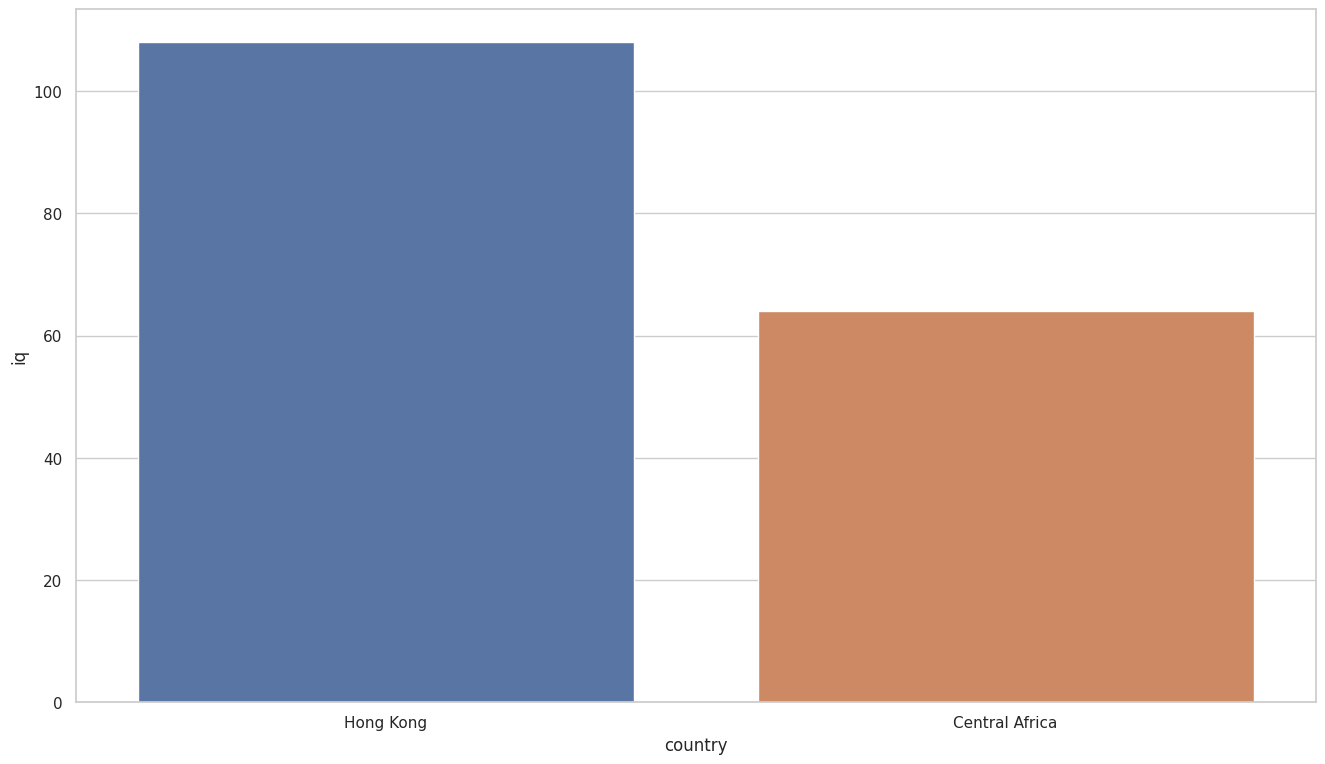

In [ ]:
from seaborn import barplot
sns.set(rc={"figure.figsize":(16, 9)}, style="whitegrid") #width=16, #height=9
barplot(x="country", y="iq", data=dl)

<Axes: xlabel='country', ylabel='iq'>

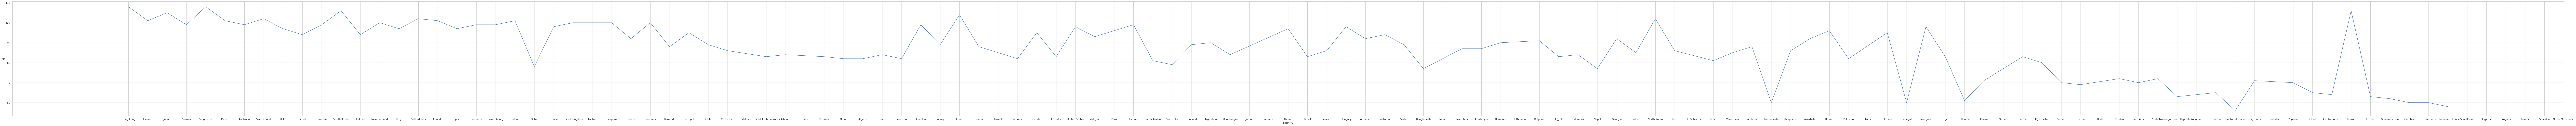

In [ ]:
#it was found out that there is a correlation between male life expectancy & Iq
from seaborn.relational import lineplot
plt.figure().set_figwidth(200)
sns.set(rc={"figure.figsize":(16, 9)}, style="whitegrid") #width=16, #height=9
lineplot(x=df.index,y="iq", data= df)

In [ ]:
#conclusion
#the lower the iq, the lower the male life expectancy however there must  be other factors affecting male life expectancy

<Axes: xlabel='country', ylabel='health'>

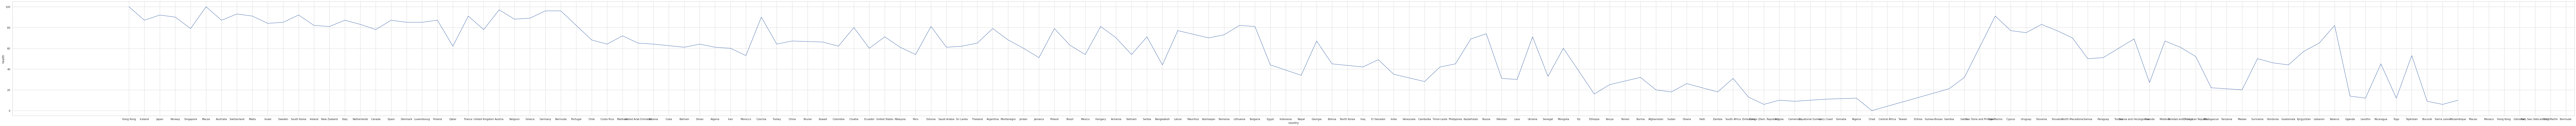

In [ ]:
#It was found out that there is a correlation between health & daily_max_temp
from seaborn.relational import lineplot
plt.figure().set_figwidth(200)
sns.set(rc={"figure.figsize":(16, 9)}, style="whitegrid") #width=16, #height=9
lineplot(x=df.index,y="health", data= df)

In [ ]:
df.groupby(df.index)[["health"]].mean().sort_values("health",ascending=False)

health
country                
Hong Kong         100.0
Macao             100.0
Austria            97.0
Germany            96.0
Bermuda            96.0
...                 ...
Tonga               NaN
Tuvalu              NaN
Venezuela           NaN
Virgin Islands      NaN
Yemen               NaN

[192 rows x 1 columns]

In [ ]:
#Macao&Hong Kong is the highest country in health
df.loc[["Macao"]]
df.loc["Macao"][["daily_max_temp"]]

daily_max_temp    26.0
Name: Macao, dtype: object

In [ ]:
#Chad is the lowest country in health
df.loc[["Chad"]]
df.loc["Chad"][["daily_max_temp"]]

daily_max_temp    35.4
Name: Chad, dtype: object

In [ ]:
data2 = {'country': ['Macao', 'Chad'], 'daily_max_temp': [26,34.5]}
dt=pd.DataFrame(data2)

<Axes: xlabel='country', ylabel='daily_max_temp'>

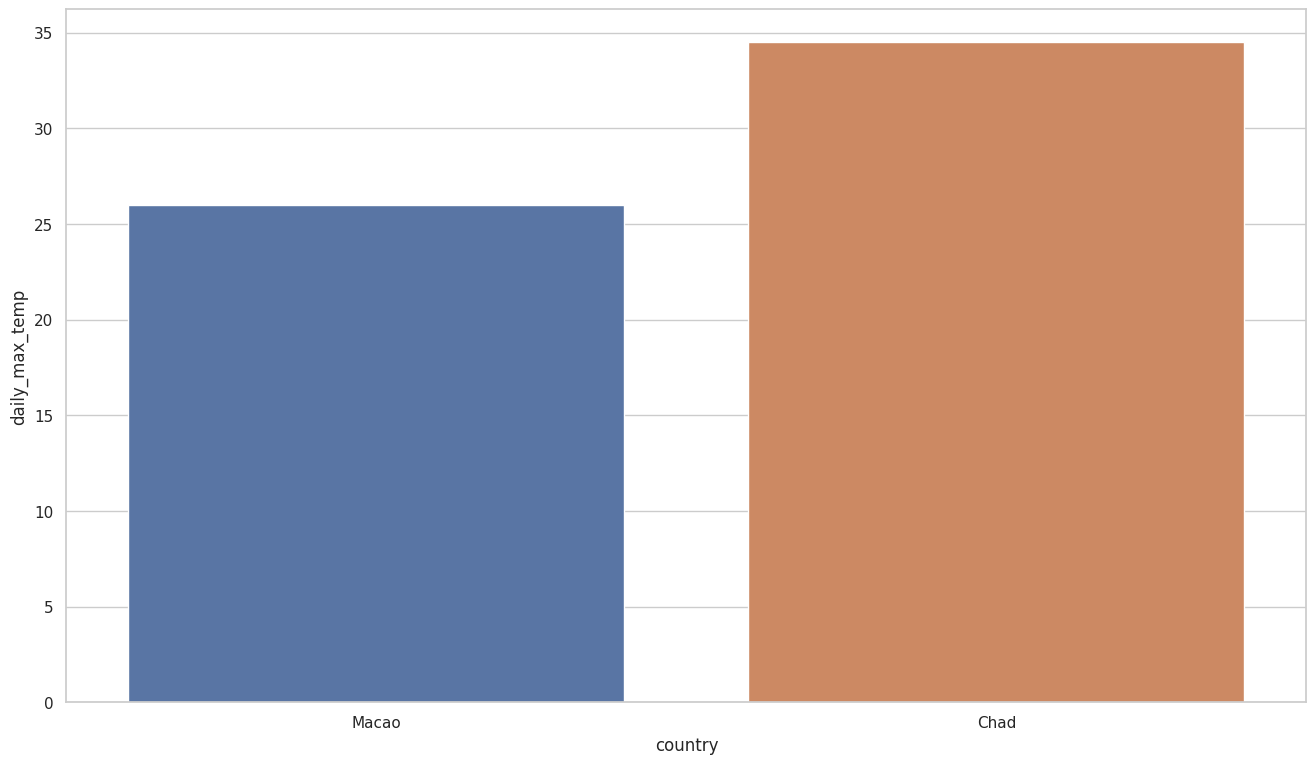

In [ ]:
from seaborn import barplot
sns.set(rc={"figure.figsize":(16, 9)}, style="whitegrid") #width=16, #height=9
barplot(x="country", y="daily_max_temp", data=dt)

<Axes: xlabel='country', ylabel='daily_max_temp'>

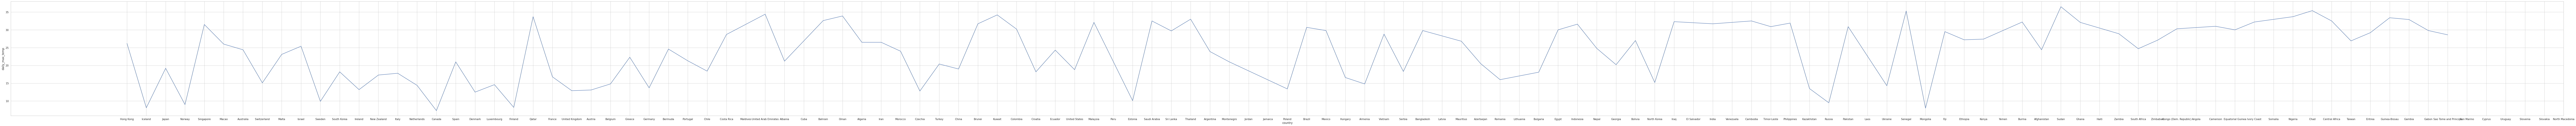

In [ ]:
#It was found out that there is a correlation between health & daily_max_temp
from seaborn.relational import lineplot
plt.figure().set_figwidth(200)
sns.set(rc={"figure.figsize":(16, 9)}, style="whitegrid") #width=16, #height=9
lineplot(x=df.index,y="daily_max_temp", data= df)

In [ ]:
df.groupby(df.index)[["daily_max_temp"]].mean().sort_values("daily_max_temp",ascending=False)

daily_max_temp
country                             
Sudan                           36.5
Chad                            35.4
Senegal                         35.3
United Arab Emirates            34.4
Kuwait                          34.2
...                              ...
Tuvalu                           NaN
Uganda                           NaN
Uruguay                          NaN
Virgin Islands                   NaN
Yemen                            NaN

[192 rows x 1 columns]

In [ ]:
#conclusion cannot make sure if the hypothesis is right as there are other countries with high max temp but with good health as well

In [ ]:
#it was found out that there is a correlation between stability & rights

<Axes: xlabel='country', ylabel='stability'>

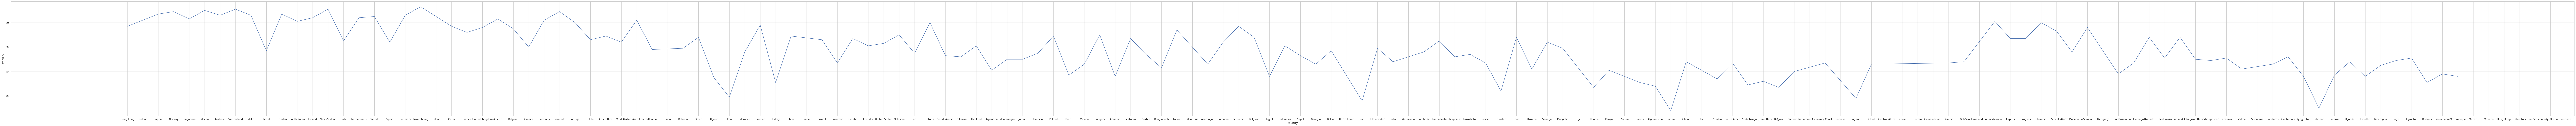

In [ ]:

from seaborn.relational import lineplot
plt.figure().set_figwidth(200)
sns.set(rc={"figure.figsize":(16, 9)}, style="whitegrid") #width=16, #height=9
lineplot(x=df.index,y="stability", data= df)

In [ ]:
df.groupby(df.index)[["stability"]].mean().sort_values("stability",ascending=False)

stability
country                   
Luxembourg            93.0
New Zealand           91.0
Switzerland           91.0
Macao                 90.0
Bermuda               89.0
...                    ...
Tonga                  NaN
Tuvalu                 NaN
Venezuela              NaN
Virgin Islands         NaN
Yemen                  NaN

[192 rows x 1 columns]

In [ ]:
#Luxembourg is the highest country in stability
df.loc[["Luxembourg"]]
df.loc["Luxembourg"][["stability"]]

stability    93.0
Name: Luxembourg, dtype: object

In [ ]:
#sudan is the lowest country in stability
df.loc[["Sudan"]]
df.loc["Sudan"][["stability"]]

stability    8.0
Name: Sudan, dtype: object

In [ ]:
df.loc[["Luxembourg"]]
df.loc["Luxembourg"][["rights"]]

rights    99.0
Name: Luxembourg, dtype: object

In [ ]:
df.loc[["Sudan"]]
df.loc["Sudan"][["rights"]]

rights    11.0
Name: Sudan, dtype: object

<Axes: xlabel='country', ylabel='rights'>

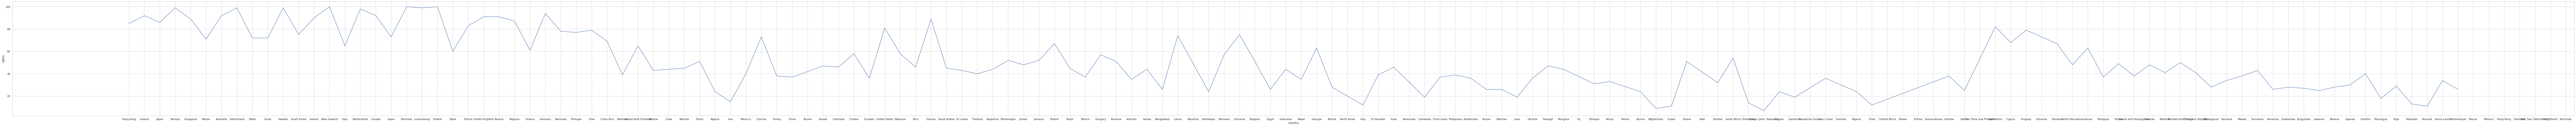

In [ ]:
from seaborn.relational import lineplot
plt.figure().set_figwidth(200)
sns.set(rc={"figure.figsize":(16, 9)}, style="whitegrid") #width=16, #height=9
lineplot(x=df.index,y="rights", data= df)

In [ ]:
df.groupby(df.index)[["rights"]].mean().sort_values("rights",ascending=False)

rights
country                
New Zealand       100.0
Denmark           100.0
Finland           100.0
Sweden             99.0
Switzerland        99.0
...                 ...
Tonga               NaN
Tuvalu              NaN
Venezuela           NaN
Virgin Islands      NaN
Yemen               NaN

[192 rows x 1 columns]

In [ ]:
#Conclusion: hypothesis is true the lower the rights the lower the stability, but there are other factors affecting stabiliy as well

# How the dataframe was created


This section is not relevant for doing the project, you can ignore it.

In case the dataset needs to be recreated, or if you are a very curious student, this is how it was done (on a local machine, _not_ in Colab):

```python
import pandas as pd
import glob
from functools import reduce

# 1. Download and extract data from
#    https://www.kaggle.com/datasets/madhurpant/world-population-data

# 2. Merge all dataframes
joint_df = reduce(
    lambda df1, df2: df1.merge(df2, on="country", how="outer"),
    [pd.read_csv(path) for path in glob.glob("world-population-data/*")],
)

# 3. Make "country" the index
joint_df.set_index(["country"], inplace=True)

# 4. Save the result
joint_df.to_csv("world-population-data.csv")
```